# K-Means Clustering on Mall Customers Dataset
This project is one of my Machine Learning mini projects. For this project, we have a [mall customers](https://github.com/richardcsuwandi/my-portfolio/blob/master/ML%20Mini%20Projects/datasets/mall_customers.csv) dataset that contains the customer ID, gender, age, annual income, and spending score. The categories in the dataset, include:
- CustomerID: The ID of the customers, ranging from 1 to 200
- Gender: The gender of the customer, either male or female
- Age: The age of the customers, ranging from 18 to 70
- Annual Income: The annual income of the customers in thousand dollars
- Spending Score: The spending score of the customers, ranging from 1 to 100

The goal of this project is to create a K-Means Clustering model to form clusters of mall customers using the features of the data.

In [2]:
# Importing the Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Data

In [3]:
# Create a dataframe for the data
df = pd.read_csv("mall_customers.csv")
df

,Customer ID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


For this project, we are only going to use useful features. So, we can drop the 'Customer ID' column.

In [4]:
# Drop the 'Customer ID' column
df = df.drop('Customer ID', axis=1)
df

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [5]:
# Exploring the data
df.describe(include='all')

,Gender,Age,Annual Income,Spending Score
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


As we can see from the data description above, the data doesn't contain any missing value. However, the data are not properly scaled so we might need to scale the data. Also, the 'Gender' column contains categorical values so we also need to encode them into numerical values.

## Preprocessing the Data
We are going to preprocess our data using the label encoder and standard scaler.

In [6]:
# Create a label encoder object
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [7]:
# Create a standard scaler object
scaler = StandardScaler()

# Scale the 'Gender' column
df['Gender'] = scaler.fit_transform(df[['Gender']])

# Scale the 'Age' column
df['Age'] = scaler.fit_transform(df[['Age']])

# Scale the 'Annual Income' column
df['Annual Income'] = scaler.fit_transform(df[['Annual Income']])

# Scale the 'Spending Score' column
scaler.fit(df[['Spending Score']])
df['Spending Score'] = scaler.fit_transform(df[['Spending Score']])

In [8]:
# Show the head of the data after preprocessing
df.head()

,Gender,Age,Annual Income,Spending Score
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


## Principal component analysis (PCA)
We will use the PCA to reduce the number of features in our data into just 2 categories.

In [9]:
# Create a PCA reducer object
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(df)

## Exploratory Data Analysis (EDA)
To better explore our data, we can visualize the data with a scatter plot.

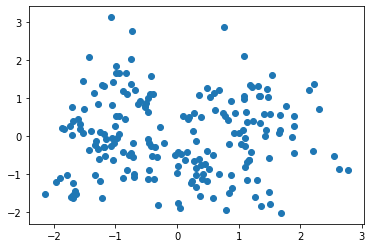

In [10]:
# Create a scatter plot
plt.scatter(reduced_data[:,0], reduced_data[:,1])
plt.show()

## Elbow Plot
We can use the Elbow Plot to determine the number of clusters for our model

In [11]:
# Calculate the Sum of Squared Error (SSE) for different number of clusters
sse = []
k_range = range(1,10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_data)
    sse.append(kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

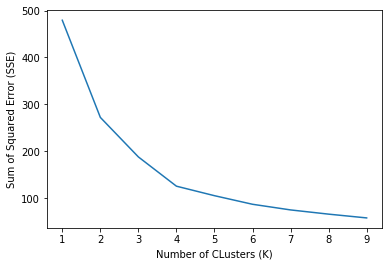

In [12]:
# Create the Elbow Plot
plt.xlabel('Number of CLusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(k_range,sse)
plt.show

From the Elbow Plot above, we can see that the elbow is at K = 4. Therefore, we can choose the number of clusters to be 4.

## Building the Model
Finally, we can build our K-Means Clustering model from the mall customers dataset.

In [13]:
# Build and fit the model
kmeans = KMeans(n_clusters=4)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
# Making the clusters
cluster = kmeans.predict(reduced_data)

# Create a dataframe for the reduced data
reduced_df = pd.DataFrame(reduced_data)

# Add the 'Cluster' column to the dataframe
reduced_df['Cluster'] = cluster
reduced_df

,0,1,Cluster
0,-0.406383,-0.520714,2
1,-1.427673,-0.367310,2
2,0.050761,-1.894068,0
3,-1.694513,-1.631908,2
4,-0.313108,-1.810483,0
...,...,...,...
195,-1.179572,1.324568,3
196,0.672751,1.221061,1
197,-0.723719,2.765010,3
198,0.767096,2.861930,1


In [15]:
# Get the cluster centers
kmeans.cluster_centers_

array([[ 0.80089898, -0.95285608],
       [ 1.12773395,  0.75231371],
       [-1.15208536, -0.48631961],
       [-0.89664028,  1.25740369]])

## Visualizing the Clusters
Finally, we can visualize the clusters with a plot.

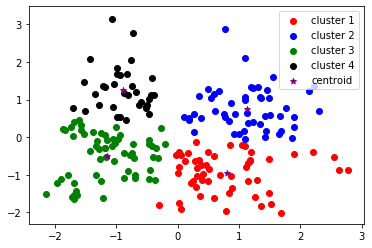

In [16]:
cluster_1 = reduced_df[reduced_df['Cluster']==0]
cluster_2 = reduced_df[reduced_df['Cluster']==1]
cluster_3 = reduced_df[reduced_df['Cluster']==2]
cluster_4 = reduced_df[reduced_df['Cluster']==3]

# Create a scatter plot for the data in each cluster
plt.scatter(cluster_1[0],cluster_1[1],color='red',label='cluster 1')
plt.scatter(cluster_2[0],cluster_2[1],color='blue',label='cluster 2')
plt.scatter(cluster_3[0],cluster_3[1],color='green',label='cluster 3')
plt.scatter(cluster_4[0],cluster_4[1],color='black',label='cluster 4')

# Create a scatter plot for each of the cluster's center
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()